### Условие 1: Задача 1
Общие требования:
+ Постройте график
+ Назовите график
+ Сделайте именование оси x и оси y
+ Сделайте выводы

#### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df = pd.read_csv(".\kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

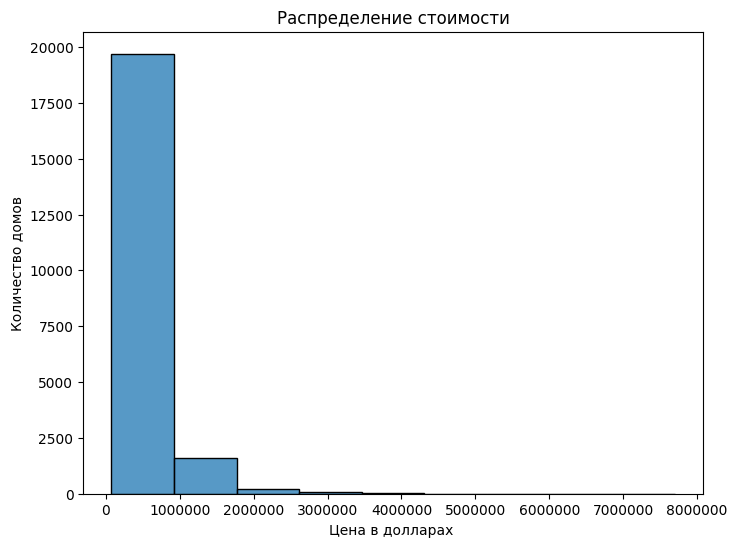

In [3]:
df['price'].astype(int)
plt.figure(figsize=(8,6))

sn.histplot(df['price'] ,bins=9)

plt.title("Распределение стоимости")
plt.xlabel("Цена в долларах ")
plt.ylabel("Количество домов")
#нашел на stackoverflow как убрать научное представление нулей, 
#это метод из ScalarFormatter,который работает без импорта, если только одну ось указывать
plt.ticklabel_format(useOffset=False,style='plain',axis='x')

Видим, что большинство домов находится в пределах до 1,5 млн долларов, будет лучше построить ящик с усами с удалением выбросов

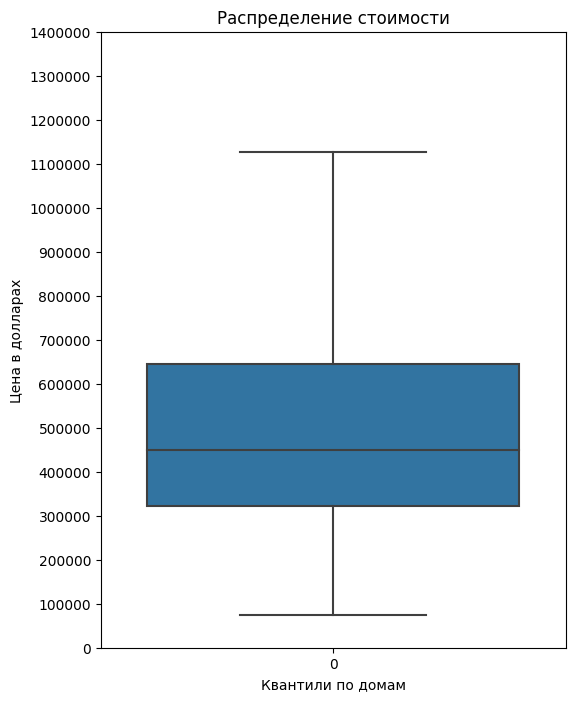

In [4]:
plt.figure(figsize=(6,8))

sn.boxplot(df['price'] ,showfliers=False)

plt.title("Распределение стоимости")
plt.xlabel("Квантили по домам")
plt.ylabel("Цена в долларах")
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.yticks(np.arange(1.5e+6,step=1e+5));


Таким образом, медиана цены равна где-то 450 тыс. долларов, половина всех домов лежит в диапазоне 300-650 тыс.долларов, с небольшим уклоном другой половины в более дорогой сегмент до 1 млн 150 тыс. долларов(медиана ближе к нижней границе ящика)

#### 1.3 Изучите распределение квадратуры жилой

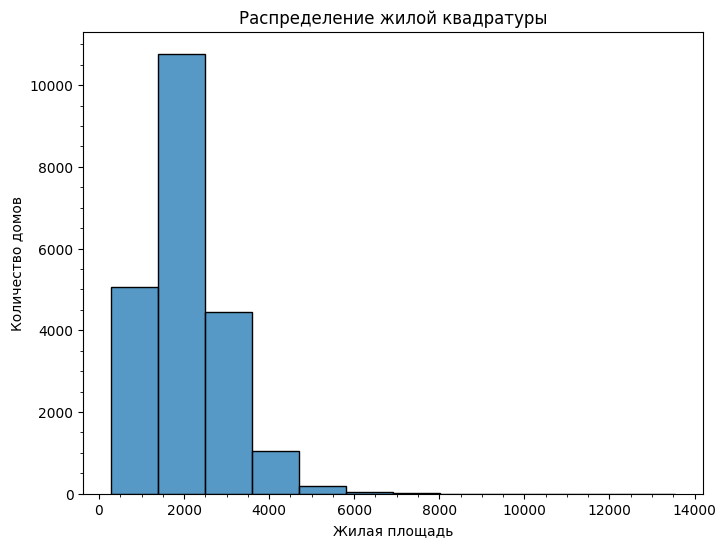

In [5]:

ax = plt.figure(figsize=(8,6))

sn.histplot(df['sqft_living'] ,bins=12)
#здесь заметно, что с малым числом bins точность заметно падает, например, при bins = 9 самый частотный стобец размазывается по двум интервалам
plt.title("Распределение жилой квадратуры")
plt.xlabel("Жилая площадь")
plt.ylabel("Количество домов")
#нашел на stackoverflow как убрать научное представление нулей, 
#это метод из ScalarFormatter,который работает без импорта, если только одну ось указывать
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.minorticks_on()

здесь схожая ситуация с выбросами и ящик с усами будет уместен

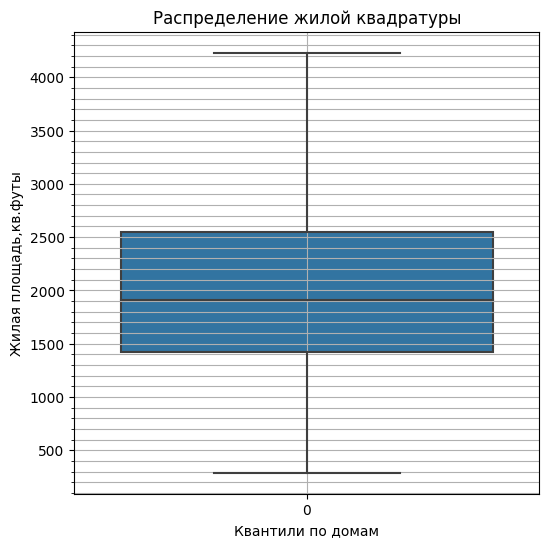

In [6]:
plt.figure(figsize=(6,6))

sn.boxplot(df['sqft_living'] ,showfliers=False)

plt.title("Распределение жилой квадратуры")
plt.xlabel("Квантили по домам")
plt.ylabel("Жилая площадь,кв.футы")
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.minorticks_on()
plt.grid(visible=True,which='both')



Здесь за вычетом выбросов можно судить, что все дома лежат в пределах 200-4200 футов,большая часть  от 1500 до 2500 футов, и кол-во домов на усах более-менее одинаковое(медиана почти в середине), но с большим расбросом 4-го квантиля по квадратуре.

#### 1.4 Изучите распределение года постройки

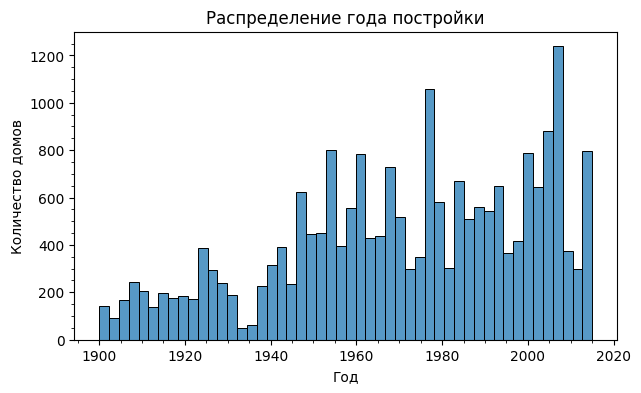

In [7]:
plt.figure(figsize=(7,4))

sn.histplot(df['yr_built'] ,bins=50)

plt.title("Распределение года постройки")
plt.xlabel("Год")
plt.ylabel("Количество домов")
plt.minorticks_on()


Здесь распределение более менее равномерное, с небольшим линейным возрастанием и парой аномалией - мало домов в конце 30-х годов, что совпадает с "Великой депрессией" в США и мировым кризисом. Всплески в конце 80-х(совпадает с НТР и экономическим подъемом 83-89гг) и конце 2010-х (лопнувший пузырь рынка недвижимости, приведший к ипотечному обвалу 2007г и очередному мировому кризису). 

### Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [8]:

water_view = df['waterfront'].value_counts()
water_view


0    21450
1      163
Name: waterfront, dtype: int64

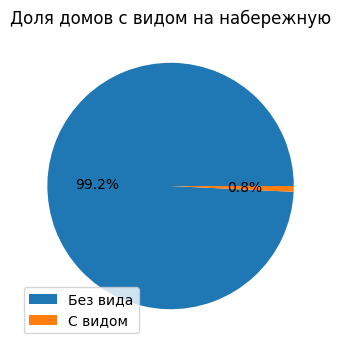

In [9]:
plt.figure(figsize=(6,4))
plt.pie(water_view,autopct='%1.1f%%')
plt.title("Доля домов с видом на набережную")
plt.legend(labels=['Без вида', 'С видом'],loc='lower left');
# handles=[0,1],

Видим, что только маленькая часть домов в датасете расположены на побережье

#### 2.2 Изучите распределение этажей домов
Количество этажей можно принять за категориальный(дискретный) признак, и построить столбчатую диаграмму.
Для начала подсчитаем и немного очеловечим признак этажности.

In [10]:
floors= df['floors'].value_counts().reset_index()
def HumanizeFloors(inp:float) -> str:
    from math import modf
    inp_parts = modf(inp)
    if inp_parts[0] != 0 :
        return f"{int(inp_parts[1])}-этажные с мансардой"
    return f"{int(inp_parts[1])}-этажные"
    
floors.loc[:,'index']= floors['index'].apply(HumanizeFloors)
floors

,index,floors
0,1-этажные,10680
1,2-этажные,8241
2,1-этажные с мансардой,1910
3,3-этажные,613
4,2-этажные с мансардой,161
5,3-этажные с мансардой,8


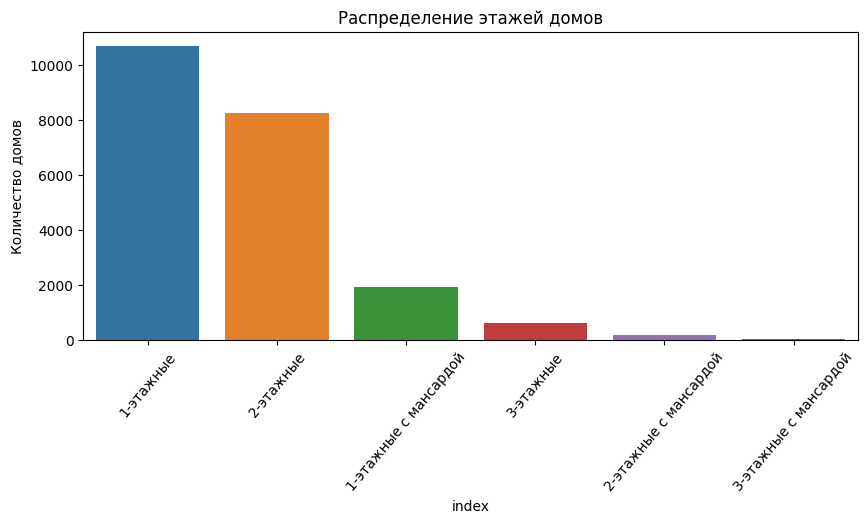

In [11]:
plt.figure(figsize=(10,4))
sn.barplot(x=floors['index'],y=floors['floors']).set(title = "Распределение этажей домов")
plt.ylabel('Количество домов')
plt.xticks(rotation=50);

In [12]:
floor_labels=floors['index'].values.tolist()
floor_labels
#переменная для выставления меток на boxplot

['1-этажные',
 '2-этажные',
 '1-этажные с мансардой',
 '3-этажные',
 '2-этажные с мансардой',
 '3-этажные с мансардой']

видим, что самые популярные типы домов не выше 2-х этажей, а постройки выше, скорее всего , дорогие особняки. Проверим гипотезу по признаку цены

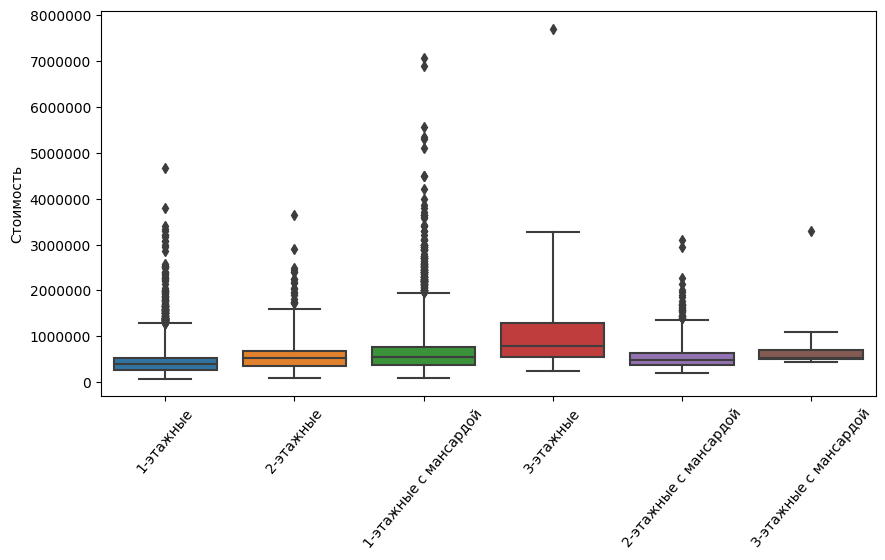

In [13]:
plt.figure(figsize=(10,5))
g = sn.boxplot(x = df['floors'], y = df['price'],whis=3)
plt.ylabel('Стоимость')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
# К сожалению, не нашел как у seaborn настроить метки по осям, пришлось через аттрибуты объекта делать
g.set_xticklabels(floor_labels)
g.set(xlabel=None) 
plt.xticks(rotation=50);



Гипотеза не подтвердилась, ценнники по домам с мансардой оказались довольно схожими с обычными домами, а в более высокой ценовой категории оказались просто 3-х этажные, и много дорогих выбросов среди 1-этажных с мансардой(возможно, из-за престижных районов по-типу Беверли Хилз)

#### 2.3 Изучите распределение состояния домов

Тоже категориальный признак, заменим циферные обозначения на слова перед постройкой столбчатой диаграммы.

In [14]:
#Здесь обойдемся без самопальных функций, и используем встроенный replaсe и словарь значений

conds= {1 : "1:Poor-Worn out", 2 : "2:Fair-Badly worn", 3 : '3:Average', 4 : '4:Good', 5 :'5:Very Good'}
df2 = df.replace({'condition':conds})
df2['condition'].sample(3)

8436     3:Average
10802    3:Average
12019    3:Average
Name: condition, dtype: object

In [15]:
df2['condition'].value_counts().sort_index()

1:Poor-Worn out         30
2:Fair-Badly worn      172
3:Average            14031
4:Good                5679
5:Very Good           1701
Name: condition, dtype: int64

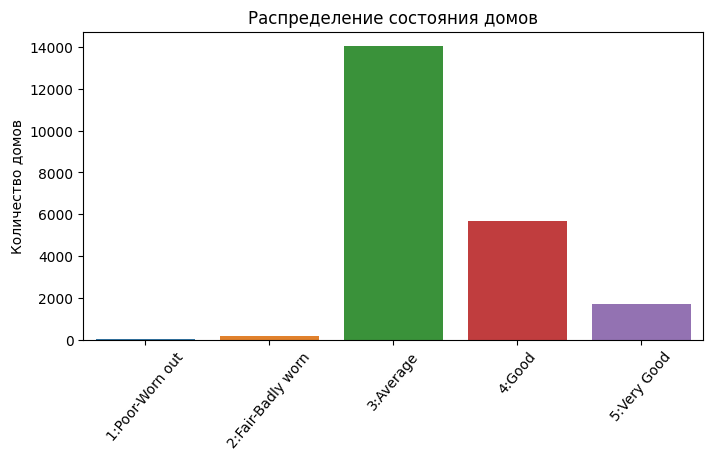

In [16]:
plt.figure(figsize=(8,4))
sn.barplot(x=df2['condition'].value_counts().sort_index().index,y=df['condition'].value_counts().sort_index().values).set(title = "Распределение состояния домов")
plt.ylabel('Количество домов')
plt.xticks(rotation=50);

Большая часть домов получила среднюю оценку состояния дома ,на 2-м и 3-м месте дома с хорошим ремонтом(или новые). 
Дома с плохим состоянием почти не продавались(что логично).


### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Вместо того, чтобы строить графики цены от признака по всем колонкам, лучше сначала выявить, насколько есть зависимость по матрице корреляции, и затем уже построить отдельные графики.

удалим колонки, по которым точно не будет какой-то математической зависимости, это почтовый индекс и идентификатор сделки

In [17]:
# df.drop(columns=['id','zipcode'],inplace=True)
# inplace при повторном запуске ячейки здесь выдает ошибку почему-то, поэтому делаю через присвоение
df3 = df.drop(columns=['id','zipcode'])
df3.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
13187,20150122T000000,626000.0,4,2.5,2570,7221,1.0,0,0,4,8,1570,1000,1958,0,47.6921,-122.387,2440,7274


In [18]:
#матрица с округлением точности
price_cor = df3.corr()
price_cor = np.round(price_cor,1)
# price_cor [np.abs(price_cor)< 0.3]= 0

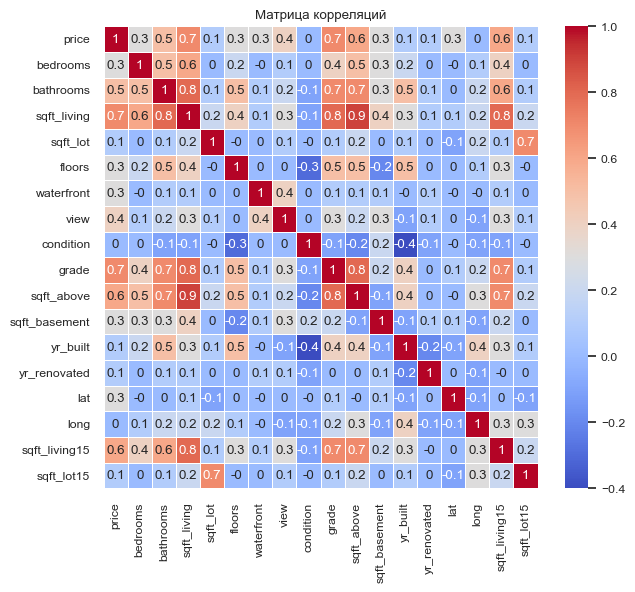

In [19]:
plt.figure(figsize=(7,6))
sn.set(font_scale=0.8)
sn.heatmap(price_cor,annot=True,cmap="coolwarm",linewidths=.5)
plt.title("Матрица корреляций");

Видим, что есть прямые корреляции от количества ванн, жилой и надземной площади,вида из окна, категории дома, и средней площади по 15-ти соседним домам. По площади графики будут довольно схожими - чем больше площадь, тем больше цена.
Думаю, будет интересно посмотреть графики с более слабой линейной зависимостью, например, состояние ремонта, год постройки и широта-долгота( по категориальным признакам вообще сложно увидеть зависимость в необработанном виде, так как данные не упорядочены по группам).

Но, для общего развития, сделаем совмещенный  график зависимости по признакам площадей.

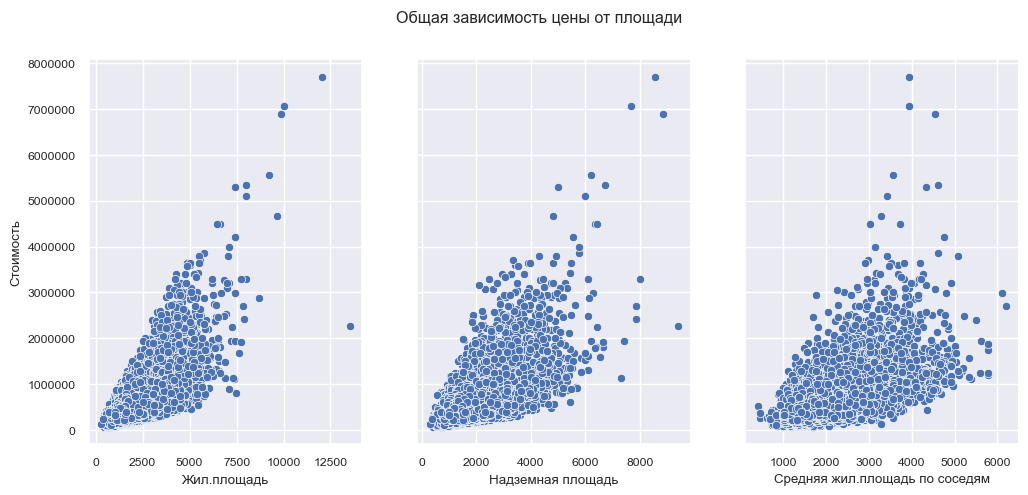

In [20]:
x = df3['price']
fig, axes = plt.subplots(1, 3, figsize=(12,5),sharey=True)
fig.suptitle("Общая зависимость цены от площади")
sn.scatterplot(y=df3['price'], x = df3['sqft_living'],ax=axes[0],legend='full').set_xlabel("Жил.площадь")
axes[0].set_ylabel("Стоимость")
sn.scatterplot(y=df3['price'], x = df3['sqft_above'],ax=axes[1]).set_xlabel("Надземная площадь")
sn.scatterplot(y=df3['price'], x = df3['sqft_living15'],ax=axes[2]).set_xlabel("Средняя жил.площадь по соседям");
plt.ticklabel_format(useOffset=False,style='plain',axis='y')

# df3_select = df3['sqft_living','sqft_above','sqft_living15']
# df3.plot(x='price', y = ['sqft_living','sqft_above','sqft_living15'], kind='scatter');

На графиках видно прямую зависимость по верхнему краю стоимости(долю прямых зависимостей мы уже знаем по матрице корреляции, это где-то 0.6-0.7), и более широкий градиент цен(больше дешевых предложений) для площадей от 1500 футов. Характер разброса площадей для одной и той же цены очень схож по графикам, просто на левых графиках он кажется меньшим из-за большего масштаба от выбросов.

---

Теперь посмотрим по характеристике ремонта. Это у нас категориальный признак со шкалой от 1 до 5, так что имеет смысл сразу сделать группировку

In [57]:
grouped_cond=df3.groupby('condition').median()
#здесь применяю медиану из-за большей устойчивости к выбросам

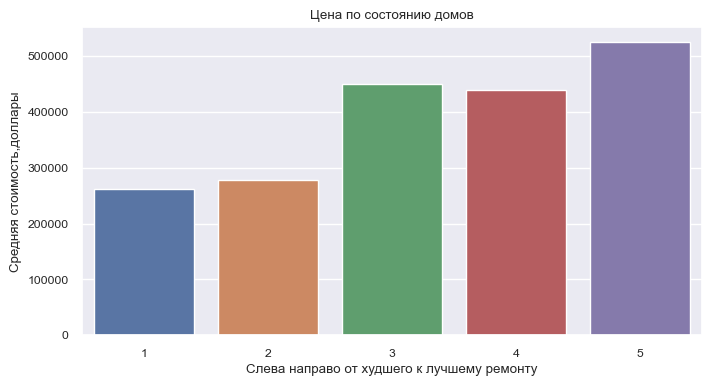

In [58]:
plt.figure(figsize=(8,4))
sn.barplot(x=grouped_cond.index,y=grouped_cond['price']).set(title = "Цена по состоянию домов")
plt.ylabel('Средняя стоимость,доллары')
plt.xlabel('Слева направо от худшего к лучшему ремонту');


Видим что нашу прямую корреляцию смутило - хоть ценники и растут с улучшением состояния дома, но попарно 1-2 и 3-4 очень схожи по средней стоимости. Это обусловлено выбросами, малым набором статистики по группам 1-2, возможно, разбросом предложения, когда другой фактор (например,дешевый регион) перебивает ценник, но только в определенной группе.

---

Для широты и долготы нам понадобится снимок из гугла по встречаемым координатам, проверим диапазон

In [24]:
df['lat'].describe().loc[['min','max']]

min    47.1559
max    47.7776
Name: lat, dtype: float64

In [25]:
df['long'].describe().loc[['min','max']]

min   -122.519
max   -121.315
Name: long, dtype: float64

Теперь вырежем эти координаты из гугла, и поместим на них нашу координатную сетку

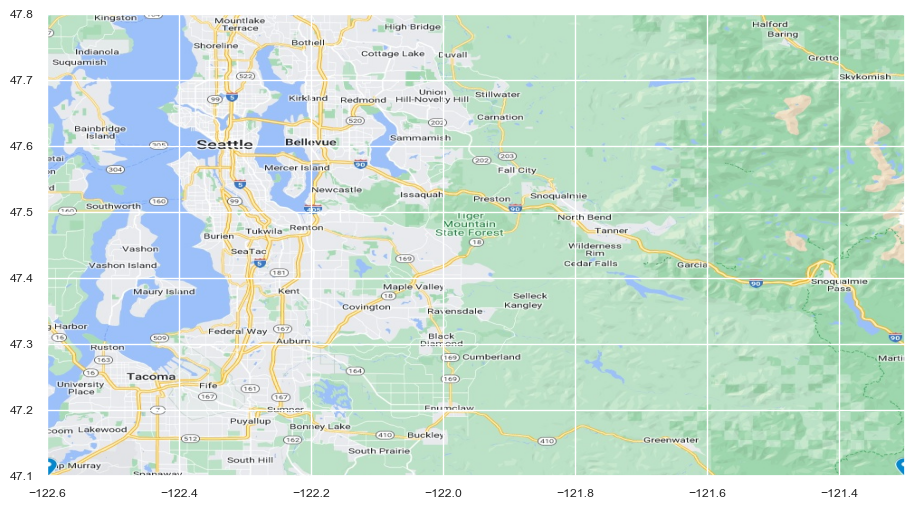

In [43]:
import matplotlib.image as img

geo = img.imread('Seattle_map.jpg')

plt.figure(figsize=[12,6])
plt.imshow(geo,extent=[-122.6,-121.3,47.1,47.8],alpha=1);

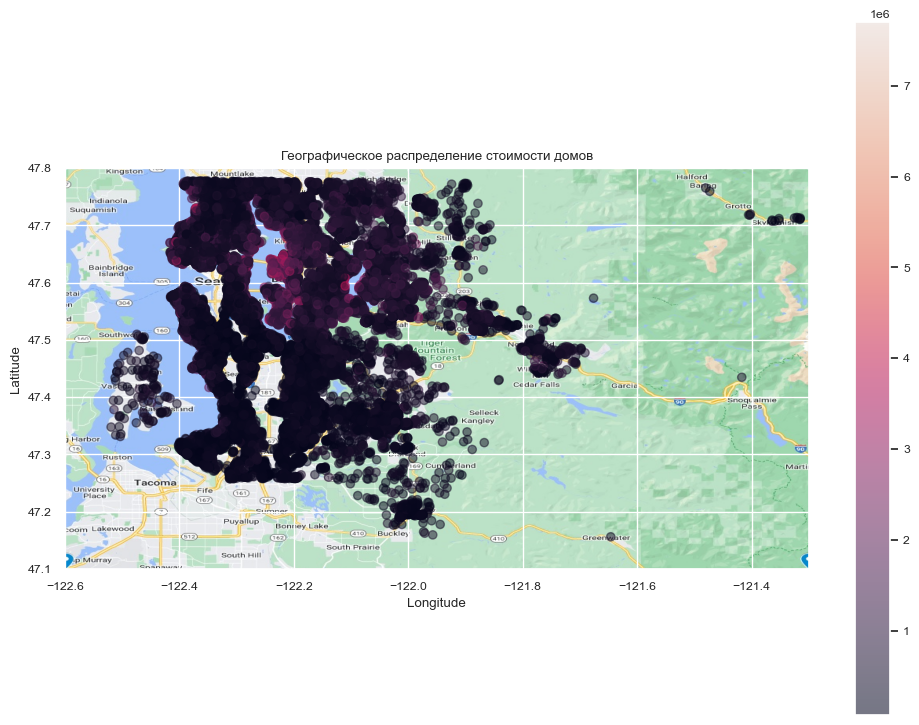

In [39]:
plt.figure(figsize=[12,9])
hdots = plt.scatter(df['long'],df['lat'],alpha=0.5,c=df['price'])
plt.imshow(geo,extent=[-122.6,-121.3,47.1,47.8],alpha=1);
plt.colorbar(hdots)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Географическое распределение стоимости домов");

Как видим, распределение домов у нас сконцентрировано по городу Сиэттл, и места , где мало дешевых домов(до 100000)- это только районы Bellevue и Mercer Island , с недвижимостью в центре и севере города(между двумя озерами) больше по цене в среднем, и относительно дешевыми домами на юге города и в окрестностях/пригороде. . Также стоит отметить, что в датасете нет данных по крупному соседнему городу, Tacoma.

Давайте попробуем отрезать большую часть домов, чтобы преобладающие в датасете по количеству дешевые точки не загораживали остальные.

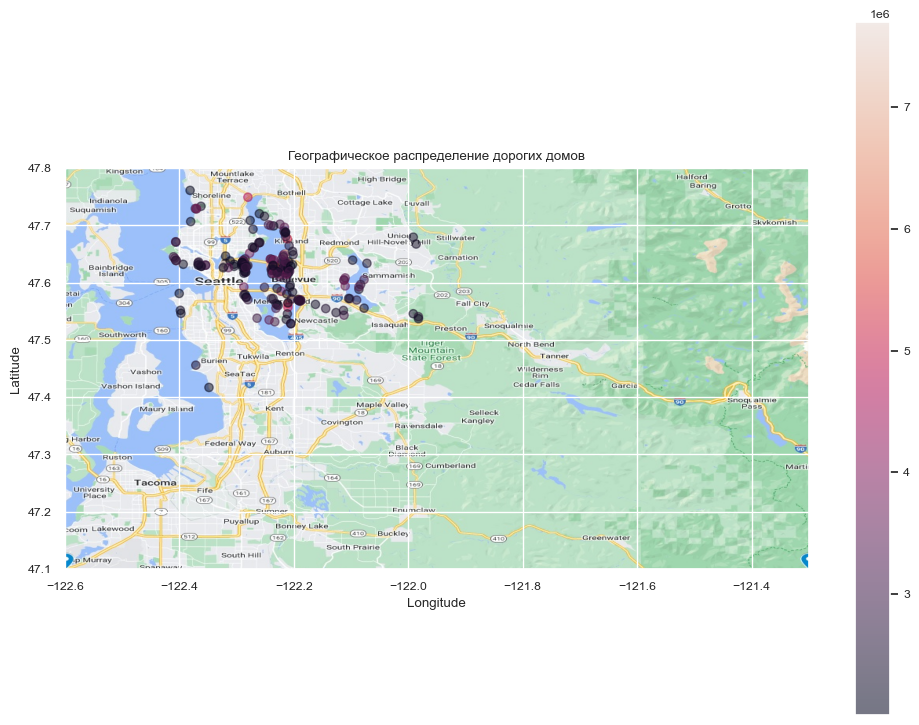

In [45]:
cut_low_price = df[df['price']>2000000]
plt.figure(figsize=[12,9])
hdots = plt.scatter(cut_low_price['long'],cut_low_price['lat'],alpha=0.5,c=cut_low_price['price'])
plt.imshow(geo,extent=[-122.6,-121.3,47.1,47.8],alpha=1);
plt.colorbar(hdots)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Географическое распределение дорогих домов");

Здесь хорошо видно, что большая часть дорогих домов расположена на берегу или в самом центре города(снова Bellevue)

---

Последнее, что хотелось бы посмотреть, в виду отсутствия корреляции в матрице, это год постройки. Здесь , скорее всего, понадобится группировка по 5-ти годовым или больше интервалам, но для начала построим по необработанным данным.

<Figure size 1200x900 with 0 Axes>

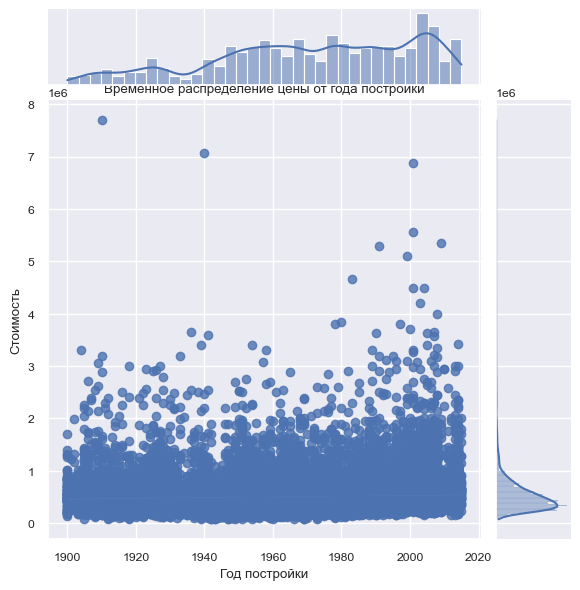

In [49]:
plt.figure(figsize=[12,9]);
sn.jointplot(x=df['yr_built'],y=df['price'],kind = 'reg')
plt.xlabel("Год постройки")
plt.ylabel("Стоимость")
plt.title("Временное распределение цены от года постройки");

Если не брать во внимание выбросы выше 600тыс. , то видим небольшое увеличение числа дорогих домов с ростом года постройки(в диапазоне от 250 тыс до 600тыс).

<Figure size 1200x900 with 0 Axes>

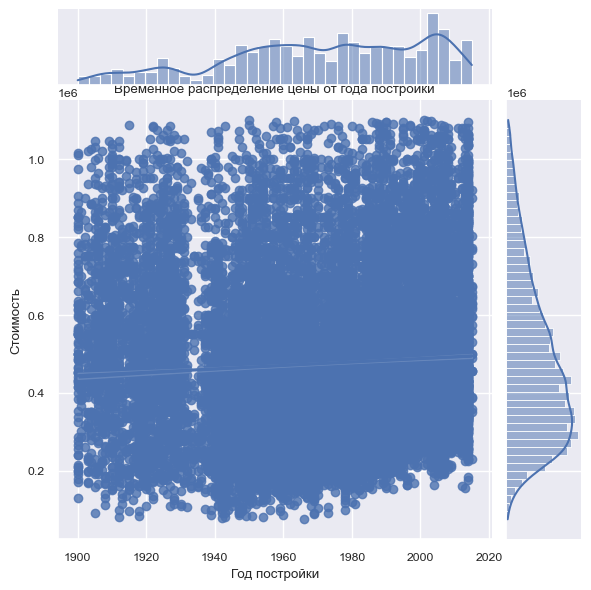

In [50]:
cut_high_price = df[df['price']<1100000]
plt.figure(figsize=[12,9]);
sn.jointplot(x=cut_high_price['yr_built'],y=cut_high_price['price'],kind = 'reg')
plt.xlabel("Год постройки")
plt.ylabel("Стоимость")
plt.title("Временное распределение цены от года постройки");

Совмещенные гистограммы по более дешевым домам особой зависимости не показал, распределение очень равномерное. Попробуем теперь через группировку и boxplot

Чтобы не путаться с годами постройки и годами сделок, тоже "очеловечим" признак, и будем показывать возраст вместо года постройки

In [147]:
yr_bins=np.arange(1899, 2020, 10)
yr_bins[-1]

2019

In [153]:
def HumanizeYears(interv:list) -> list:
    age_list=[]
    for i in range(1,len(interv)):
        age_list.append(f"{interv[-1]-interv[i-1]}-{interv[-1]-interv[i]} лет")
    return age_list

yr_bins=np.arange(1899, 2020, 10)

In [154]:

grouped_year=df.groupby(pd.cut(df['yr_built'], yr_bins,labels=HumanizeYears(yr_bins)))['price'].median()
grouped_year = grouped_year.astype(int)
grouped_year

yr_built
120-110 лет    550000
110-100 лет    510750
100-90 лет     535000
90-80 лет      474000
80-70 лет      389000
70-60 лет      400000
60-50 лет      379975
50-40 лет      436500
40-30 лет      450000
30-20 лет      486387
20-10 лет      495250
10-0 лет       539950
Name: price, dtype: int32

In [112]:
#проверим группировку, 90-80 лет дому это будут 40-е года постройки
df[(df['yr_built']>1929)&(df['yr_built']<=1939)]['price'].median()

474000.0

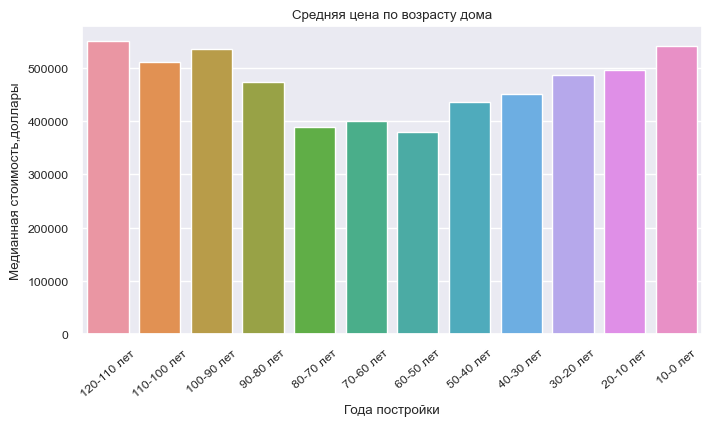

In [156]:
plt.figure(figsize=(8,4))
sn.barplot(x=grouped_year.index,y=grouped_year.values).set(title = "Средняя цена по возрасту дома")
plt.ylabel('Медианная стоимость,доллары')
plt.xticks(rotation=40);
plt.xlabel('Года постройки');


Получаем интересный провал по стоимости в 40-70 годах, возможно, это связано с более дешевым типом домов, который начали строить в тот период, или застройкой новых дешевых районов. Тут было бы интересно посмотреть еще на длительность владения домом продавца на момент сделки. Возможно, люди определенного поколения имеют тенденцию продавать дома немного дешевле.

Теперь оценим выбросы через boxplot

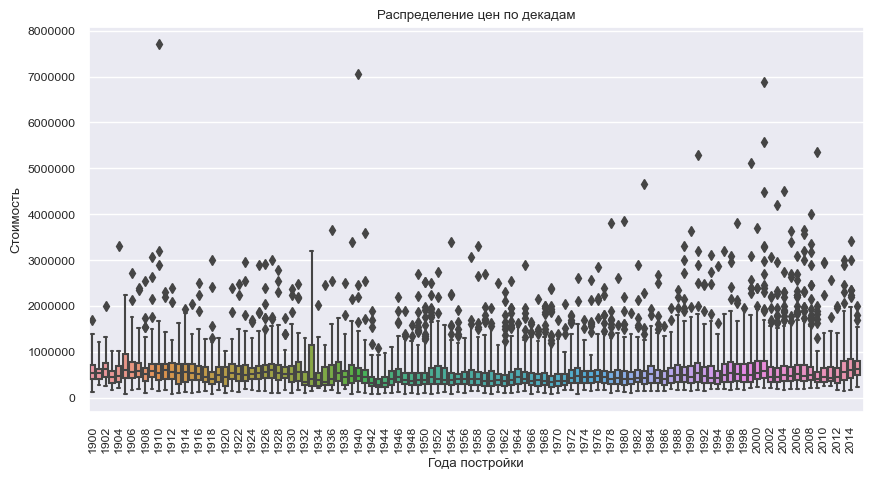

In [136]:
plt.figure(figsize=(10,5))
sn.boxplot(x = df['yr_built'], y = df['price'], whis=3).set(title = "Распределение цен по декадам")
plt.ylabel('Стоимость')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
# g2.set_xticklabels(floor_labels)
plt.xlabel("Года постройки") 
plt.xticks(np.arange(2016-1899,step=2),rotation=90);

Видим, что датасет имеет довольно равномерное распределение по выбросам в пределах 400тыс, и можно использовать для этого диапазона цен среднее арифметическое вместо медианы. В 30-х годах также стоит вспомнить наше изучение распределения частотности, в датасете малое число домов приходится на эти дома, отсюда и большой ящик и невыявляение выбросов. 
В общем можно только сделать вывод, что цена от возраста дома зависит несильно, если это дома старше 5-10 лет. И есть небольшое увеличение для более старых домов(старше 80-90) - это могут быть более архитектурно красивые дома, присущие концу 19го века, или же более престижные районы со старой застройкой(ближе к центру города) 